<a href="https://colab.research.google.com/github/Adjalma/Mini-Projeto-DNC/blob/main/Projeto_rede-neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

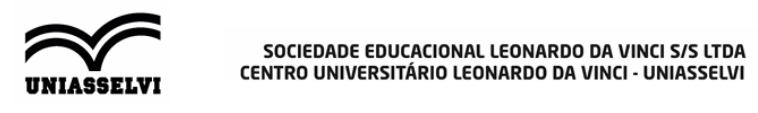

**Nome do Acadêmico:** Adjalma MAchado Aguiar Junior

**Matrícula:** 3315234

## Objetivo



## Especificação Técinca



## Pré-Processamento

Importando as bibliotecas necessárias

In [8]:

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


In [7]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(train_labels)

60000

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
len(test_labels)

10000

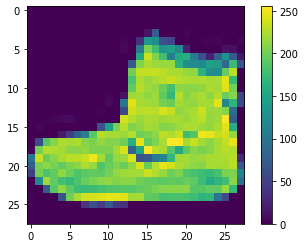

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

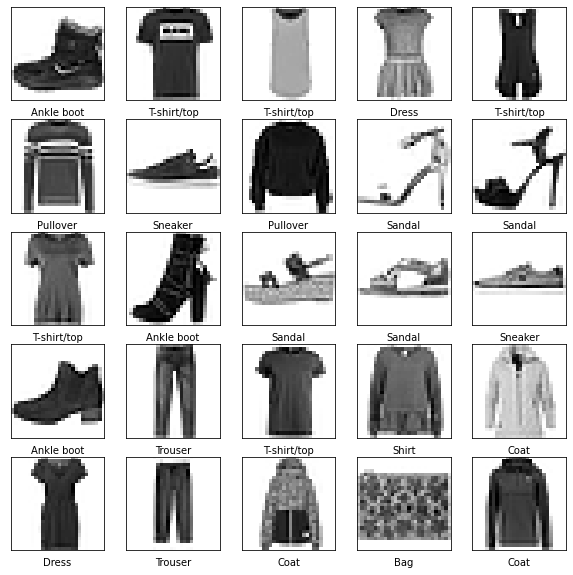

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5024 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3748 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3360 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3130 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2939 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2807 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2681 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2572 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2465 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.23

In [23]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3249 - accuracy: 0.8878 - 2s/epoch - 5ms/step

Test accuracy: 0.8877999782562256


In [24]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [25]:
predictions[0]

array([2.7318177e-07, 1.1121674e-10, 1.5046435e-08, 8.6995125e-12,
       9.4919486e-09, 8.1892703e-03, 2.6143420e-07, 9.8245246e-03,
       5.7296394e-09, 9.8198551e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

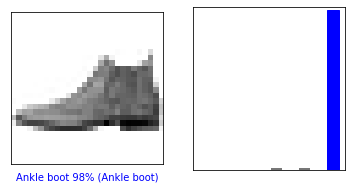

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

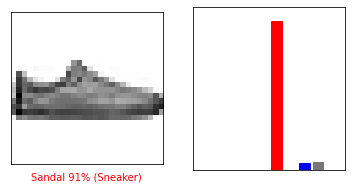

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

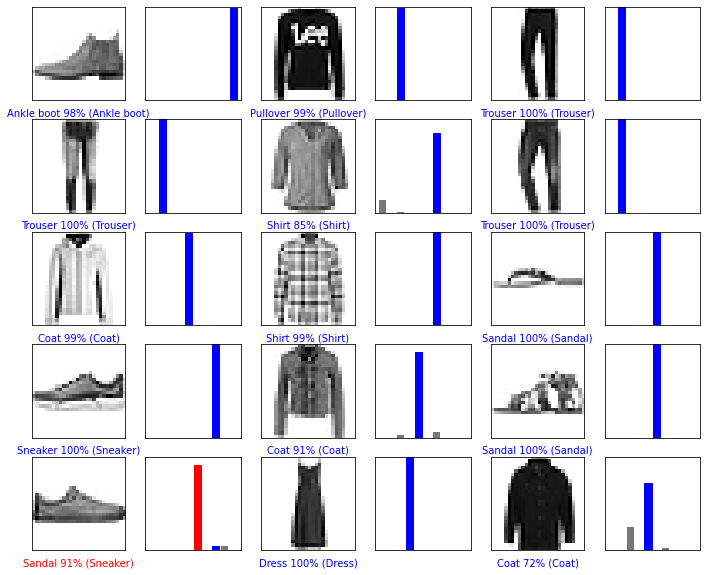

In [31]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [32]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [33]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 26ms/step
[[2.7318183e-07 1.1121634e-10 1.5046496e-08 8.6995133e-12 9.4919503e-09
  8.1892675e-03 2.6143374e-07 9.8245209e-03 5.7296625e-09 9.8198569e-01]]


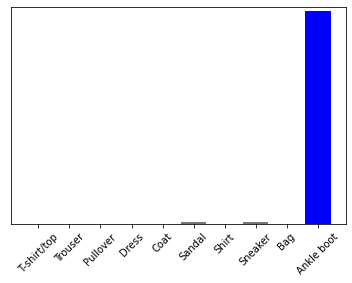

In [35]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [36]:
np.argmax(predictions_single[0])

9